In [1]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
aqi_data = '/content/drive/MyDrive/aqi.csv'

In [4]:
estimates = '/content/drive/MyDrive/smoke_est.json'

In [5]:
smoke_df = pd.read_json(estimates)

In [6]:
aqi_df = pd.read_csv(aqi_data)

In [7]:
smoke_df.columns

Index(['OBJECTID', 'USGS_Assigned_ID', 'Assigned_Fire_Type', 'Fire_Year',
       'Fire_Polygon_Tier', 'Fire_Attribute_Tiers', 'GIS_Acres',
       'GIS_Hectares', 'Source_Datasets', 'Listed_Fire_Types',
       'Listed_Fire_Names', 'Listed_Fire_Codes', 'Listed_Fire_IDs',
       'Listed_Fire_IRWIN_IDs', 'Listed_Fire_Dates', 'Listed_Fire_Causes',
       'Listed_Fire_Cause_Class', 'Listed_Rx_Reported_Acres',
       'Listed_Map_Digitize_Methods', 'Listed_Notes', 'Processing_Notes',
       'Wildfire_Notice', 'Prescribed_Burn_Notice', 'Wildfire_and_Rx_Flag',
       'Overlap_Within_1_or_2_Flag', 'Circleness_Scale', 'Circle_Flag',
       'Exclude_From_Summary_Rasters', 'Shape_Length', 'Shape_Area',
       'distance', 'smoke_estimate'],
      dtype='object')

In [8]:
aqi_df

,Unnamed: 0,Year,AQI
0,0,1981,0.194690
1,1,1982,7.764310
2,2,1983,13.492582
3,3,1984,14.084699
4,4,1985,16.915966
5,5,1986,18.074627
6,6,1987,10.411080
7,7,1988,29.569217
8,8,1989,30.754795
9,9,1990,35.853425


The provided code segment is used to create a bar chart that visualizes the distribution of fire types within a dataset named 'smoke_df.' It first calculates the counts of each unique fire type using the 'value_counts()' method and then plots these counts as bars on a bar chart. The x-axis represents different fire types, and the y-axis shows the corresponding counts for each fire type. The chart is given the title "Fire Types," and the x and y axes are labeled "Fire Type" and "Count," respectively. This visual representation provides a clear and concise overview of the frequency of each fire type in the dataset, making it easier to understand the distribution of fire types.

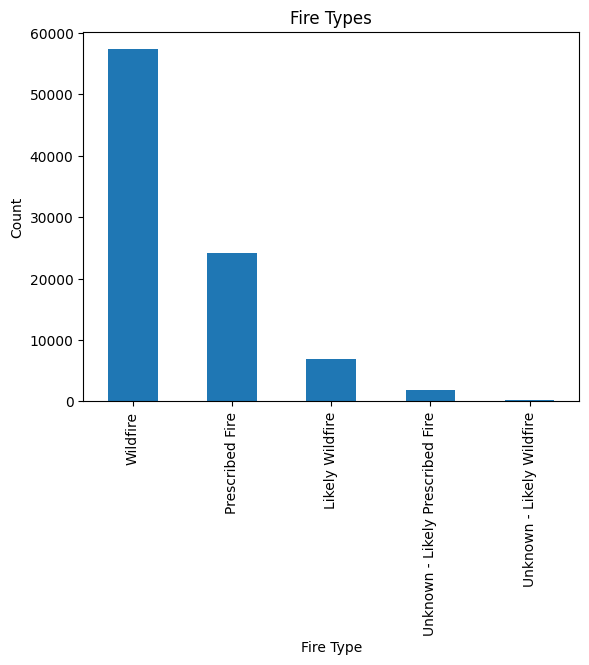

In [9]:
fire_type_counts = smoke_df['Assigned_Fire_Type'].value_counts()
fire_type_counts.plot(kind='bar', title='Fire Types')
plt.xlabel('Fire Type')
plt.ylabel('Count')
plt.show()

'Fire_Year' and 'GIS_Acres' from the 'smoke_df' dataset. 'Fire_Year' represents the year of fire incidents, and 'GIS_Acres' represents the acreage affected by those fires. Each point on the plot corresponds to a specific data entry, with the X-coordinate indicating the year of the fire incident and the Y-coordinate representing the acreage affected. This visualization helps to assess patterns or trends in fire incidents and their impact on acreage over time.

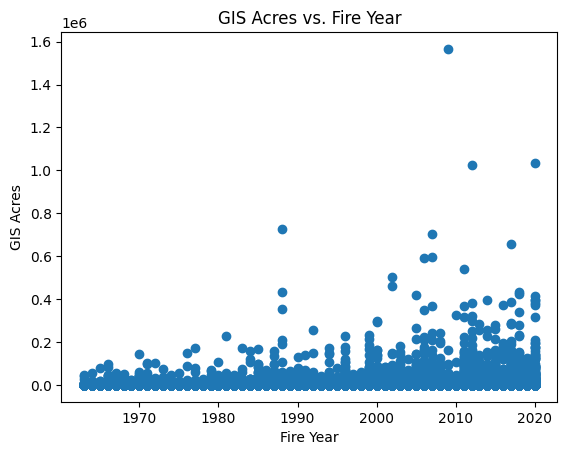

In [10]:
plt.scatter(smoke_df['Fire_Year'], smoke_df['GIS_Acres'])
plt.title('GIS Acres vs. Fire Year')
plt.xlabel('Fire Year')
plt.ylabel('GIS Acres')
plt.show()

##1. Produce a histogram showing the number of fires occurring every 50 mile distance from your assigned city up to the max specified distance.

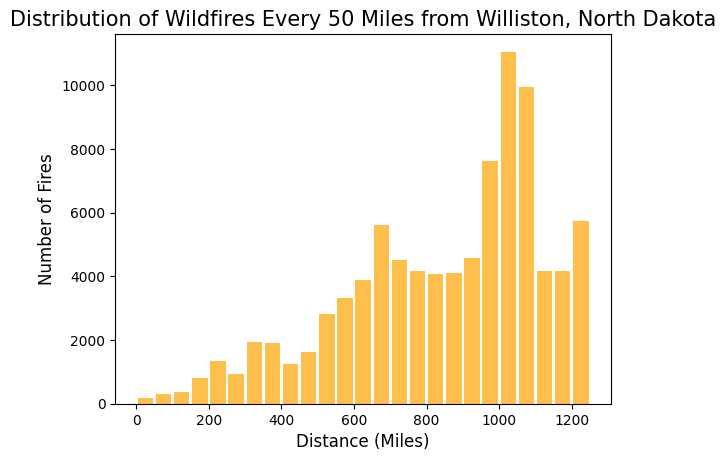

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have your data in a DataFrame named 'smoke_df'
# Replace 'smoke_df' with the appropriate DataFrame containing your data.

# Create an empty list to store distances
distances = []

# Extract the distances from the DataFrame and convert them to floats
for distance_str in smoke_df['distance']:
    try:
        distance_float = float(distance_str)
        distances.append(distance_float)
    except ValueError:
        # Handle cases where 'distance' is not a valid float
        pass

# Define the bin width (50 miles)
bin_width = 50

# Create a histogram with specified bins
plt.hist(distances, bins=np.arange(0, max(distances) + bin_width, bin_width), color='orange', alpha=0.7, rwidth=0.85)

# Customize the plot's aesthetics
plt.xlabel("Distance (Miles)", fontsize=12)
plt.ylabel("Number of Fires", fontsize=12)
plt.title("Distribution of Wildfires Every 50 Miles from Williston, North Dakota", fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show the plot
plt.show()

##2. Produce a time series graph of total acres burned per year for the fires occurring in the specified distance from your city.

The provided code defines a function, plot_total_acres_burned_per_year(dataframe), which is used to create a time series graph displaying the total acres burned per year for fires within a specified distance from Williston, North Dakota. The function first groups the data by 'Fire_Year' and calculates the sum of 'GIS_Acres' for each year. It then resets the index to make 'Fire_Year' a column in the resulting DataFrame. The time series graph is plotted with years on the X-axis and the total acres burned on the Y-axis. This visualization allows for a clear understanding of the annual trend in the total acres burned, providing insights into the extent of fire incidents in the specified area over the years.

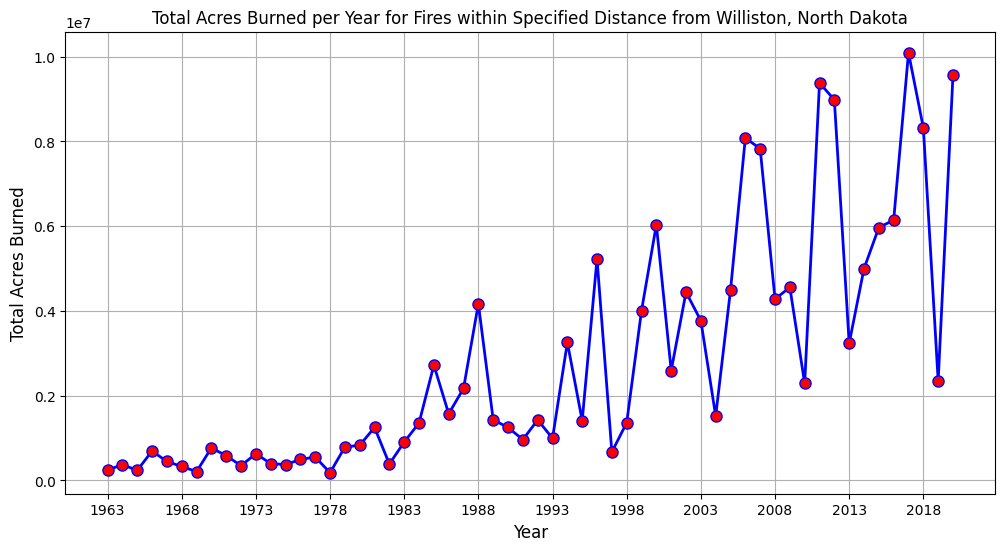

In [12]:
def plot_total_acres_burned_per_year(dataframe):
    # Group the data by 'Fire_Year' and sum the 'GIS_Acres' for each year
    area_burnt = dataframe.groupby('Fire_Year')['GIS_Acres'].sum()
    area_df = area_burnt.reset_index()  # Reset the index to get 'Fire_Year' as a column

    # Create a time series graph
    plt.figure(figsize=(12, 6))
    plt.plot(area_df['Fire_Year'], area_df['GIS_Acres'], marker='o', linestyle='-', color='b', linewidth=2, markersize=8, markerfacecolor='r')
    plt.title('Total Acres Burned per Year for Fires within Specified Distance from Williston, North Dakota')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Total Acres Burned', fontsize=12)
    plt.grid(True)
    plt.xticks(area_df['Fire_Year'][::5])
    plt.show()

# Assuming you have the 'smoke_df' DataFrame containing your data
# Call the function to plot the data
plot_total_acres_burned_per_year(smoke_df)

This code segment processes and summarizes data related to fire incidents and smoke estimates in the 'smoke_df' dataset. It starts by calculating the mean smoke estimate for each year and then identifies and isolates years with smoke estimates greater than 5. Subsequently, it computes the average smoke estimate for these high-smoke years. The results are stored in the 'smoke_final' DataFrame, providing a condensed view of the average smoke estimates for the selected years. This data manipulation and filtering enable a more focused analysis of the years with high smoke values, potentially aiding in understanding patterns or trends in severe smoke incidents.

In [14]:
smoke_df.groupby('Fire_Year').mean()['smoke_estimate'].head()
smoke_year = smoke_wfs.groupby('Fire_Year').mean()['smoke_estimate']
smoke_final = smoke_year.to_frame()
smoke_final.reset_index(inplace=True)
smoke_final.head()

<ipython-input-14-fabd48a0455d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  smoke_df.groupby('Fire_Year').mean()['smoke_estimate'].head()
<ipython-input-14-fabd48a0455d>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  smoke_year = smoke_wfs.groupby('Fire_Year').mean()['smoke_estimate']


,Fire_Year,smoke_estimate
0,1963,22.011917
1,1964,12.485709
2,1965,28.968676
3,1966,26.960796
4,1967,20.512021


This code segment creates the 'aqi_smoke' DataFrame by merging two datasets: 'smoke_final' and 'aqi_df,' likely containing information on smoke estimates and air quality index (AQI), respectively. The merging process is based on the 'Fire_Year' from 'smoke_final' and the 'Year' from 'aqi_df,' aligning the data for the corresponding years. The resulting 'aqi_smoke' DataFrame includes columns for 'Fire_Year,' 'smoke_estimate,' and 'AQI,' providing a consolidated view of the relationship between smoke estimates and air quality index values over time. This dataset enables the exploration of how changes in smoke levels are associated with variations in air quality, allowing for a better understanding of the impact of smoke on the region's air quality throughout the specified years.

In [15]:
aqi_smoke = smoke_final.merge(aqi_df,left_on='Fire_Year',right_on='Year')
aqi_smoke = aqi_smoke[['Fire_Year','smoke_estimate','AQI']]
aqi_smoke.head()

,Fire_Year,smoke_estimate,AQI
0,1981,20.390651,0.194690
1,1982,15.568126,7.764310
2,1983,26.800906,13.492582
3,1984,26.693225,14.084699
4,1985,21.245191,16.915966


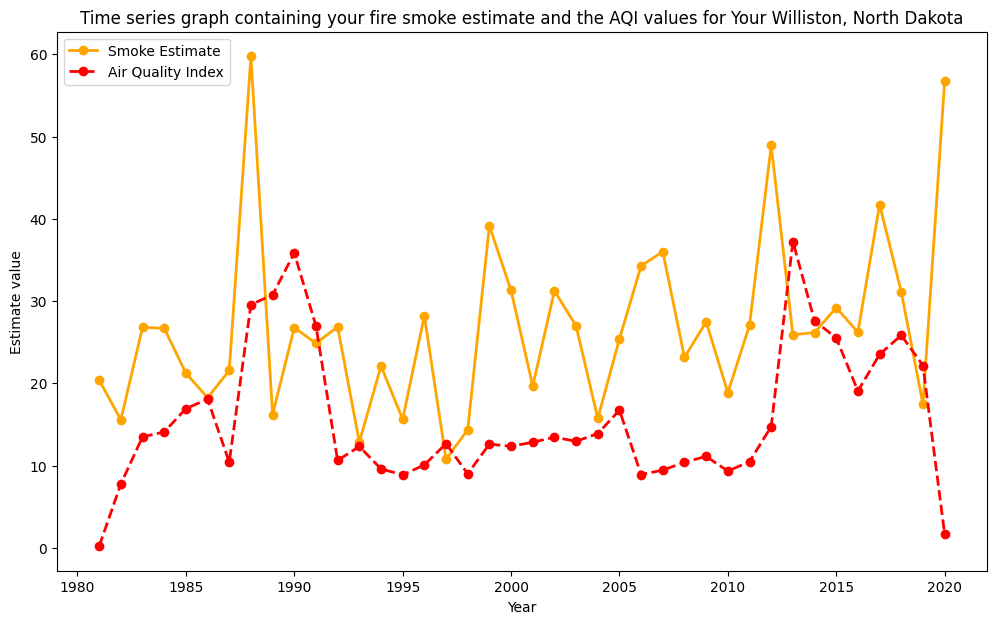

In [21]:
plt.figure(figsize=(12, 7))
plt.plot(aqi_smoke['Fire_Year'], aqi_smoke['smoke_estimate'], color='orange', linestyle='-', marker='o', linewidth=2, label='Smoke Estimate')
plt.plot(aqi_smoke['Fire_Year'], aqi_smoke['AQI'], color='red', linestyle='--', marker='o', linewidth=2, label='Air Quality Index')
plt.xlabel('Year')
plt.ylabel('Estimate value')
plt.title('Time series graph containing your fire smoke estimate and the AQI values for Your Williston, North Dakota')
plt.legend(loc="upper left")
plt.savefig('Smoke_Estimate_vs_AQI_Values.png')
plt.show()

Lastly, you should develop a predictive model based on the fire data and smoke estimate for your assigned city. Your model should predict smoke estimates for every year for the next 25 years (i.e., 2024-2049). You should be careful to make sure your predictions convey appropriate levels of uncertainty in the prediction.

##3. Produce a time series graph containing your fire smoke estimate for your city and the AQI estimate for your city.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpos1fz7g4/csgmkfo8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpos1fz7g4/jc2tdgb4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94298', 'data', 'file=/tmp/tmpos1fz7g4/csgmkfo8.json', 'init=/tmp/tmpos1fz7g4/jc2tdgb4.json', 'output', 'file=/tmp/tmpos1fz7g4/prophet_modeluclj5on4/prophet_model-20231109231255.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:12:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:12:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


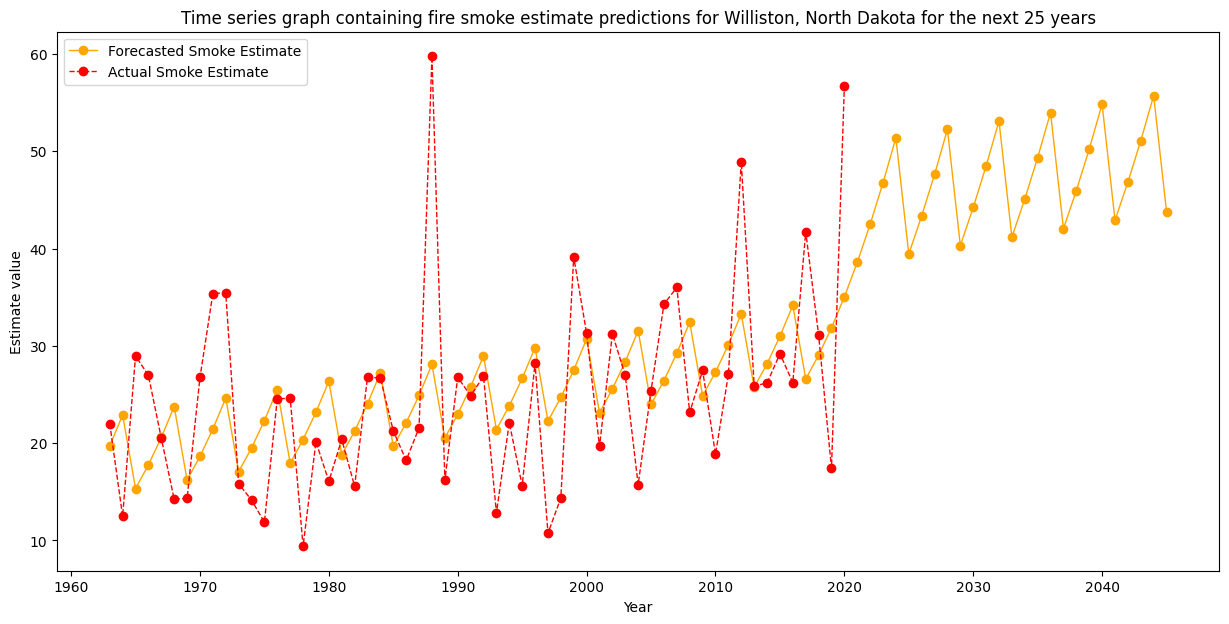

In [20]:

from prophet import Prophet


# Assuming you have a DataFrame 'smoke_final' with columns 'Fire_Year' and 'smoke_estimate'
smoke_pred = smoke_final.rename(columns={'Fire_Year': 'ds', 'smoke_estimate': 'y'})

# Convert 'ds' to datetime format if not already in that format
smoke_pred['ds'] = pd.to_datetime(smoke_pred['ds'], format='%Y')

# Initialize and fit the Prophet model
model = Prophet(changepoint_prior_scale=0.05, yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False, growth='linear')
smoke_pred['cap'] = 30  # Assuming a maximum smoke estimate of 30 (adjust as needed)
model.fit(smoke_pred)

# Create a DataFrame with future years for prediction (25 years into the future)
future = model.make_future_dataframe(periods=25, freq='Y')
future['cap'] = 30  # Assuming a maximum smoke estimate of 30 (adjust as needed)

# Generate the forecast
forecast = model.predict(future)

# Plot the forecasted values and actual data
plt.figure(figsize=(15, 7))
plt.plot(forecast['ds'], forecast['yhat'], color='orange', linestyle='-', marker='o', linewidth=1, label='Forecasted Smoke Estimate')
plt.plot(smoke_pred['ds'], smoke_pred['y'], color='red', linestyle='--', marker='o', linewidth=1, label='Actual Smoke Estimate')
plt.xlabel('Year')
plt.ylabel('Estimate value')
plt.title('Time series graph containing fire smoke estimate predictions for Williston, North Dakota for the next 25 years')
plt.legend(loc="upper left")
plt.show()

In [19]:
future_forecast = forecast[['ds','yhat']]
future_forecast.tail(26)

,ds,yhat
57,2020-01-01,35.027522
58,2020-12-31,38.576003
59,2021-12-31,42.486877
60,2022-12-31,46.755041
61,2023-12-31,51.374760
62,2024-12-31,39.442370
63,2025-12-31,43.353244
64,2026-12-31,47.621408
65,2027-12-31,52.241127
66,2028-12-31,40.308737
